In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import scipy.stats as stats
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
boston_df = pd.DataFrame(data.data, 
                         columns=data['feature_names'])
boston_df['MEDV'] = data['target']
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [3]:
# Saving the training file to the local file system
boston_df.to_csv("train.csv")

In [4]:
df = boston_df.copy()
X = df.drop(columns=['MEDV'], axis=1)
y = df['MEDV']

In [5]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Observation**:
1. There are 506 samples and 14 features including the target.
2. There are no missing values
3. All the data are numerical. But, INDUS, CHAS, RM, RAD should be of type int. 

In [6]:
# Changing dtypes
dtype_feat = ['INDUS', 'CHAS', 'RM', 'RAD']
for feat in dtype_feat:
    df[feat] = df[feat]. astype('int')

In [7]:
# Checking duplicates
print("No of duplicate values in the dataset: ", df.duplicated().sum())

No of duplicate values in the dataset:  0


In [8]:
# Checking for constant features
print("No of constant features: ", len([col for col in df if df[col].nunique==1]))

No of constant features:  0


In [9]:
# Checking for features with variance < 0.1
low_var=[]
for col in df:
    if df[col].var()<0.1:
        low_var.append(col)
        
print("Features with variance < 0.1: ", low_var)

Features with variance < 0.1:  ['CHAS', 'NOX']


In [10]:
# Checking for missing values
print("Total missing values in the dataset: ", df.isnull().sum().sum())

Total missing values in the dataset:  0


In [11]:
# Exploring Numerical features
numericalFeatures=[feat for feat in df.columns if df[feat].dtypes!='object']
numericalFeatures

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [12]:
# Discrete Features
discreteFeatures = [feat for feat in numericalFeatures if df[feat].nunique()<25]
discreteFeatures

['INDUS', 'CHAS', 'RM', 'RAD']

In [13]:
# Changing dtype of discrete features to category
for feat in discreteFeatures:
    df[feat] = df[feat].astype('category')

In [14]:
continuousFeatures = [feat for feat in numericalFeatures if feat not in discreteFeatures]
continuousFeatures

['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [15]:
# Descriptive stats of continuous data
df.describe().T.style.background_gradient(cmap='twilight')

,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.613524,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
ZN,506.000000,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
NOX,506.000000,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
AGE,506.000000,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
DIS,506.000000,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
TAX,506.000000,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000
PTRATIO,506.000000,18.455534,2.164946,12.600000,17.400000,19.050000,20.200000,22.000000
B,506.000000,356.674032,91.294864,0.320000,375.377500,391.440000,396.225000,396.900000
LSTAT,506.000000,12.653063,7.141062,1.730000,6.950000,11.360000,16.955000,37.970000
MEDV,506.000000,22.532806,9.197104,5.000000,17.025000,21.200000,25.000000,50.000000


**Observation**:
1. Most of the features are skewed.
2. 89% crime rate might be an exxagerated figure.
3. Majority of the houses are more than 60yrs old.
4. On an average, tax paid by every household amounts to 400 a year.
5. The average cost of a house amounts to 22.

In [16]:
# Descriptive stats of discrete data
df.describe(include=['category']).T.style.background_gradient(cmap='twilight')

,count,unique,top,freq
INDUS,506,20,18,132
CHAS,506,2,0,471
RM,506,6,6,269
RAD,506,9,24,132


In [17]:
# Creating a dataframe for discrete features
df_discrete = df[discreteFeatures]
df_discrete.head()

,INDUS,CHAS,RM,RAD
0,2,0,6,1
1,7,0,6,2
2,7,0,7,2
3,2,0,6,3
4,2,0,7,3


In [18]:
# Checking cardinality of discrete features
print("Cardinality\n","-"*10)
for col in df_discrete:
    print(col," : ",df_discrete[col].nunique())

Cardinality
 ----------
INDUS  :  20
CHAS  :  2
RM  :  6
RAD  :  9


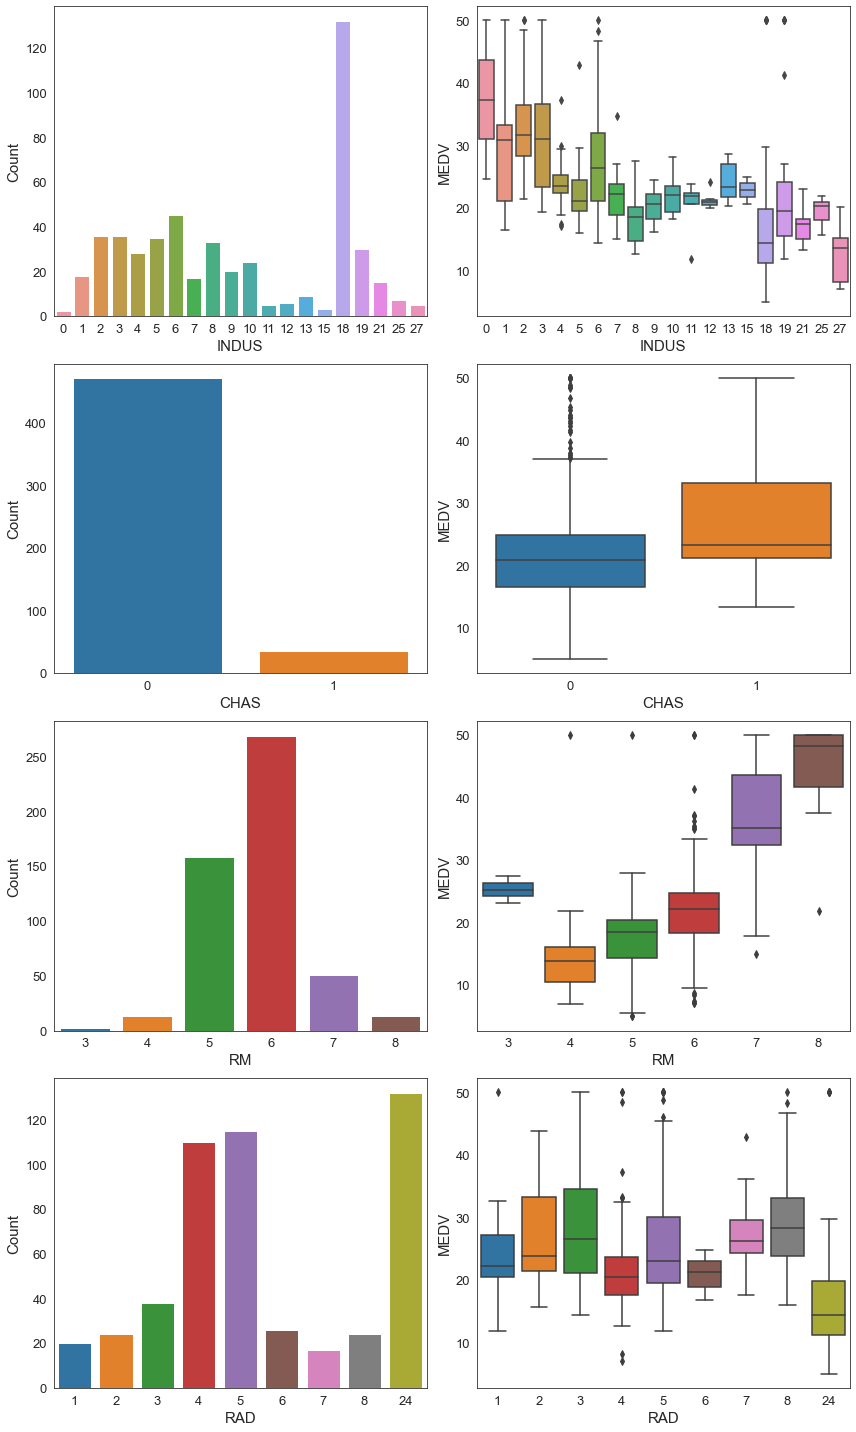

In [19]:
# Checking the distribution of discrete features

plt.figure(figsize=(12,20), facecolor='white')
plotnumber = 1

for column in df_discrete:
    if plotnumber<= 8:
        ax1 = plt.subplot(4,2,plotnumber)
        sns.countplot(df_discrete[column])
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Count', fontsize=15)
        
        ax2 = plt.subplot(4,2, plotnumber+1)
        sns.boxplot(x=df_discrete[column], y=df['MEDV'])
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('MEDV',fontsize=15)
    plotnumber+=2
plt.tight_layout()

**Observations**:
1. Most of the distribution for 'INDUS' seems to be grouped from 1 to 10 and thereafter we see a scattered pattern with peak at 18. We find three price ranges for houses with "INDUS" = 0-3, 4-15, 18-27

2. Most of CHAS is dominated by the class "0". There seems to be not much difference in the median housing prices for 'CHAS'.

3. Most of the houses have either 5 or 6 rooms. Its interesting to note that houses with 3 rooms command higher average price compared to houses with 6 rooms or less.

4. Classes from 9 to 23 in RAD seems missing. Chances are that all those might have been clubbed together at 24. Though there is not much difference in the median housing prices for classes 1 to 8 in RAD, there seems to be a considerable difference between class 24 and rest of the RAD.

Hence, we can:
1. Group INDUS into 3 categories: 0-3, 4-15, 18-27
2. Drop CHAS
3. Group RAD into 2 catergories: 0-8, 9-24

In [20]:
# Creating a dataframe for Categorical features
df_cont = df[continuousFeatures]
df_cont.head()

,CRIM,ZN,NOX,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0.538,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.469,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.469,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.458,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.458,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


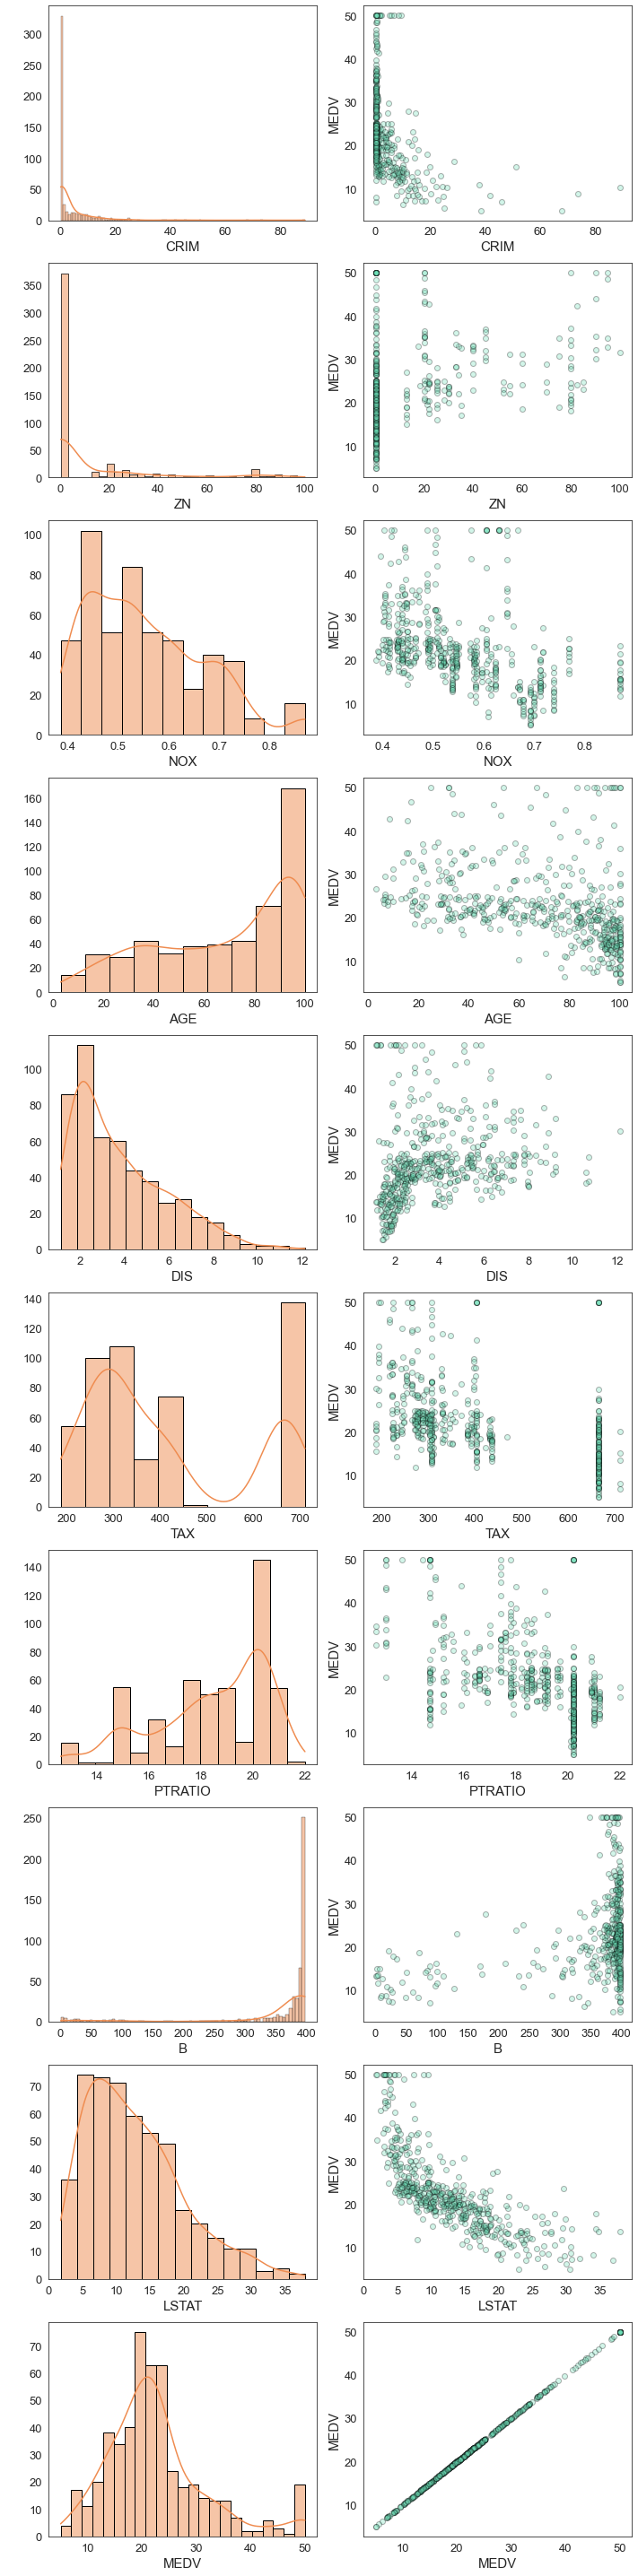

In [21]:
# Checking the distribution of continuous features

plt.figure(figsize=(10,40), facecolor='white')
plotnumber = 1

for column in df_cont:
    if plotnumber<= 20:
        ax1 = plt.subplot(10,2,plotnumber)
        sns.histplot(data=df_cont, x=column, kde=True,color='#EF8C50', edgecolor='black')
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel(column,fontsize=15)
        plt.ylabel(' ',fontsize=15)
        
        ax2 = plt.subplot(10,2, plotnumber+1)
        plt.scatter(data=df_cont, x=column, y='MEDV', alpha=0.3, color='#6CDEB7', edgecolor='black')
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('MEDV',fontsize=15)
    plotnumber+=2
plt.tight_layout()

**Observations**:
1. Most of the features are highly skewed.
2. Max price of the houses seems to be capped at 50.
3. Ignoring max housing price, 'LSTAT' displays good linear relation with the target.
4. TAX is bimodal in nature.

In [22]:
# Separating positively and negatively skewed features

positively_skewed = [feat for feat in continuousFeatures if df_cont[feat].skew()>0.7]
negatively_skewed = [feat for feat in continuousFeatures if df_cont[feat].skew()<-0.7]

In [23]:
print("Positively skewed features: ", positively_skewed)
print("\nNegatively skewed features: ",negatively_skewed)

Positively skewed features:  ['CRIM', 'ZN', 'NOX', 'DIS', 'LSTAT', 'MEDV']

Negatively skewed features:  ['PTRATIO', 'B']


In [24]:
# Checking for outliers

skewed_features = positively_skewed + negatively_skewed
outlier_dict={}

for feat in continuousFeatures:
    if feat in skewed_features:
        # Applying IQR for identifying outliers for skewed features
        q1 = df_cont[feat].quantile(0.25)
        q3 = df_cont[feat].quantile(0.75)
        iqr = q3 - q1
        upper = q3+(1.5*iqr)
        lower = q1-(1.5*iqr)
        outlier_count = np.sum(df_cont[feat]>upper)+np.sum(df_cont[feat]<lower)
    else:
        # Applying 2 standard deviations for normally distributed features
        feat_mean = np.mean(df_cont[feat])
        feat_stdev = np.std(df_cont[feat])
        upper = feat_mean+(2*feat_stdev)
        lower = feat_mean-(2*feat_stdev)
        outlier_count = np.sum(df_cont[feat]>upper)+np.sum(df_cont[feat]<lower)
    outlier_dict[feat]=outlier_count
    
for feat,count in outlier_dict.items():
    print("Outliers in {}: {}%".format(feat, (count*100/df.shape[0]).round(2)))

Outliers in CRIM: 13.04%
Outliers in ZN: 13.44%
Outliers in NOX: 0.0%
Outliers in AGE: 2.77%
Outliers in DIS: 0.99%
Outliers in TAX: 0.0%
Outliers in PTRATIO: 2.96%
Outliers in B: 15.22%
Outliers in LSTAT: 1.38%
Outliers in MEDV: 7.91%


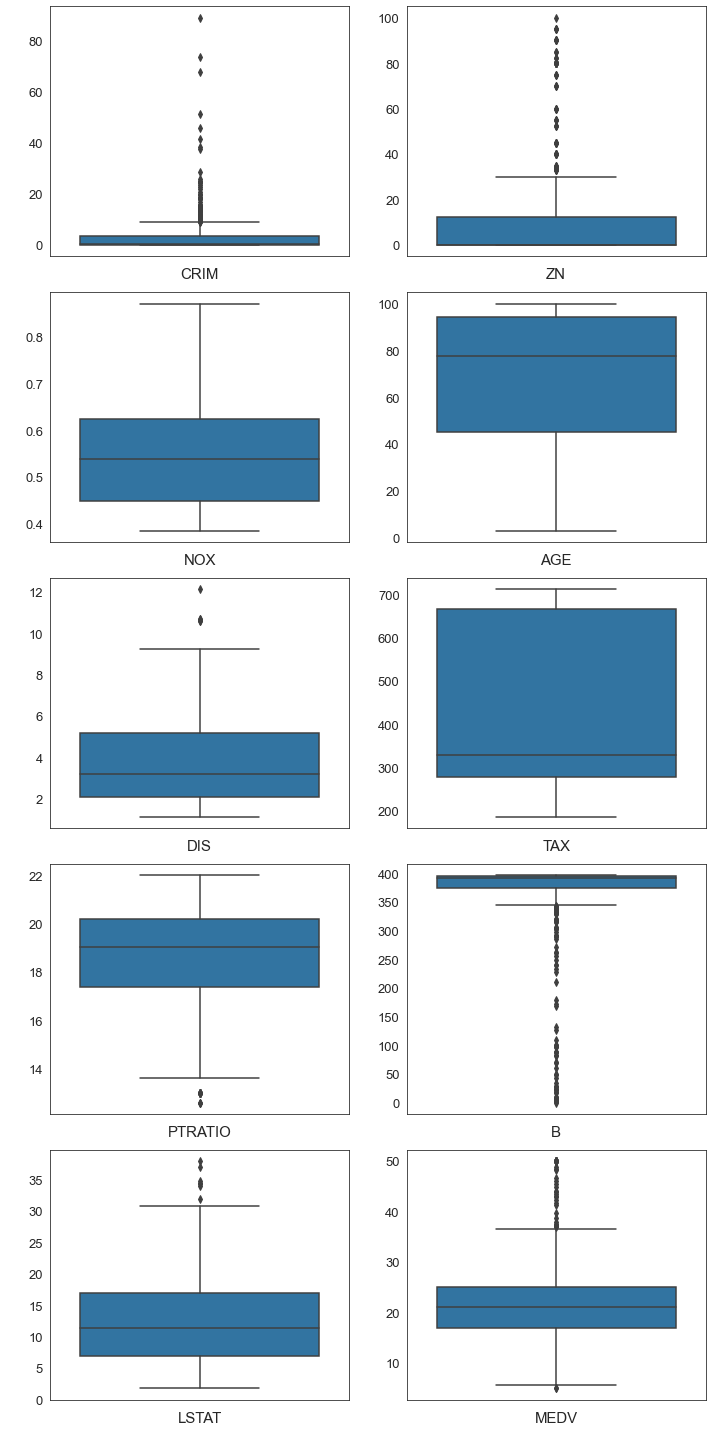

In [25]:
# Visualizing outliers

plt.figure(figsize=(10,20), facecolor='white')
plotnumber = 1

for column in df_cont:
    if plotnumber<= 10:
        ax1 = plt.subplot(5,2,plotnumber)
        sns.boxplot(data=df_cont, y=column)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel(column,fontsize=15)
        plt.ylabel(' ',fontsize=15)
    plotnumber+=1
plt.tight_layout()

**Observations**:
1. 'CRIM', 'ZN' and 'B' are heavily influenced by outliers.
2. Most other outliers could possibly be managed through transformations.
3. 'B' might require discretization.

In [26]:
# Visualizing continuous feature correlation with heatmap

# Creating correlation dataframe
df_corr = df_cont.corr().round(2)
corr_filter = (df_corr == 1) | (abs(df_corr)<0.6)
df_corr[corr_filter] = 0

# Creating numpy array of correlation matrix
arr = np.array(df_corr)

# Plotting the heatmap
fig = ff.create_annotated_heatmap(arr, x=continuousFeatures, y=continuousFeatures)
fig.show()

**Observations**:
1. DIS is highly correlated with ZN
2. TAX is highly correlated with NOX
3. AGE is highly correlated with NOX
4. LSTAT is highly correlated with AGE

In [27]:
# Calculating Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = df_cont.columns
vif['VIF'] = [variance_inflation_factor(df_cont.values,i) for i in range(df_cont.shape[1])]

# Selecting features based on linearity and VIF < 5
selected_features = [vif.loc[i,'Features'] for i,k in enumerate(list(vif['VIF'].unique())) if k>5]
print("\nFeatures with high multicollinearity based on VIF: \n", selected_features)

vif


Features with high multicollinearity based on VIF: 
 ['NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


,Features,VIF
0,CRIM,1.930985
1,ZN,2.805175
2,NOX,56.885916
3,AGE,20.606296
4,DIS,12.943699
5,TAX,19.345194
6,PTRATIO,68.067516
7,B,20.557594
8,LSTAT,12.376570
9,MEDV,13.422032


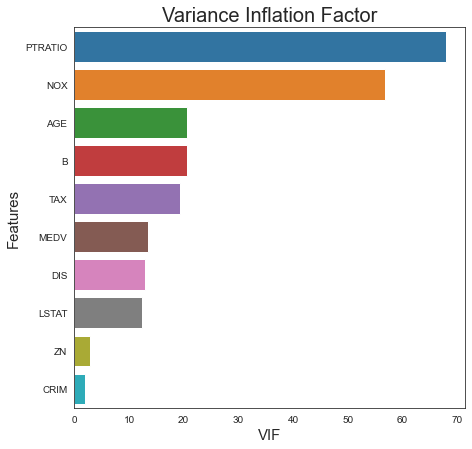

In [28]:
fig = plt.figure(figsize=(7,7))
sns.barplot(data=vif.sort_values('VIF',ascending=False), y='Features', x='VIF')
plt.xlabel('VIF', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Variance Inflation Factor', fontsize=20)
plt.show()

**Observation**:
1. PTRATIO and NOX have high VIF and should be considered for dropping.

## Data preprocessing and Model evaluation

In [29]:
# Changing dtypes
def change_dtypes(df):
    dtype_feat = ['INDUS', 'RM', 'RAD']
    for feat in dtype_feat:
        df[feat] = df[feat].astype('int')
        df[feat] = df[feat].astype('category')
    return df

In [30]:
# Binarizing 'RAD'
def binarize(df):
    df['RAD'] = np.where(df['RAD']==24, 1, 0)
    df['ZN'] = np.where(df['ZN']==0, 0, 1)
    df['B'] = np.where(df['B']<380, 0, 1)
    return df

In [31]:
# Function for Box-Cox transform
def boxcox(df):
    from scipy import stats
    feat_list = ['CRIM', 'DIS', 'LSTAT']
    for feat in feat_list:
        df[feat], _ = stats.boxcox(df[feat])
    return df

In [32]:
# Function for One hot encoding
def ohe(df):
    df_indus = pd.get_dummies(df['INDUS'], prefix='INDUS', drop_first=True)
    df_rm = pd.get_dummies(df['RM'], prefix='RM', drop_first=True)
    df = pd.concat([df, df_indus, df_rm], axis=1)
    return df

In [33]:
# Function for dropping columns
def drop_cols(df):
    df = df.drop(columns=['CHAS', 'NOX', 'PTRATIO', 'INDUS', 'RM'])
    return df

In [34]:
x_trf = (X.
         pipe(change_dtypes).
         pipe(binarize).
         pipe(boxcox).
         pipe(ohe).
         pipe(drop_cols))

In [35]:
x_trf.columns

Index(['CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'INDUS_1',
       'INDUS_2', 'INDUS_3', 'INDUS_4', 'INDUS_5', 'INDUS_6', 'INDUS_7',
       'INDUS_8', 'INDUS_9', 'INDUS_10', 'INDUS_11', 'INDUS_12', 'INDUS_13',
       'INDUS_15', 'INDUS_18', 'INDUS_19', 'INDUS_21', 'INDUS_25', 'INDUS_27',
       'RM_4', 'RM_5', 'RM_6', 'RM_7', 'RM_8'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_trf, y, test_size=0.25, random_state=42)

In [40]:
X_train.shape

(379, 32)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Saving the scaler to the local file system
scaler_filename = 'standard_scaler.pickle'
pickle.dump(scaler, open(scaler_filename, 'wb'))

## Linear Regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#Defining a function to calculate adjusted R2

def adj_r2(x,y,model):
    r2 = model.score(x,y) # calculating r2
    n = x.shape[0] # observations in dataset
    p = x.shape[1] # features in dataset
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR  = LinearRegression()

model_LR.fit(X_train_scaled, y_train)

In [ ]:
model_LR.score(X_train_scaled, y_train)

In [ ]:
model_LR.score(X_test_scaled, y_test)

In [ ]:
adj_r2(X_train_scaled, y_train, model_LR)

In [ ]:
y_pred = model_LR.predict(X_test_scaled)

In [ ]:
r2_LR = r2_score(y_test, y_pred)
print("R2 score: ", r2_LR)

In [ ]:
adj_r2_LR = adj_r2(X_test_scaled, y_test, model_LR)
print("Adjusted R2: ", adj_r2_LR)

In [ ]:
rmse_LR = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse_LR)

In [ ]:
performance = {}

performance['Linear Regression'] = [r2_LR, adj_r2_LR, rmse_LR]

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

## Lasso Regression

In [ ]:
lasso_cv = LassoCV(alphas=None,
                  cv=10,
                  max_iter=100000,
                  normalize=True)

lasso_cv.fit(X_train_scaled, y_train)

In [ ]:
alpha = lasso_cv.alpha_
alpha

In [ ]:
model_Lasso = Lasso(alpha)

model_Lasso.fit(X_train_scaled, y_train)

In [ ]:
r2_lasso = model_Lasso.score(X_test_scaled, y_test)
print("R2 score: ", r2_lasso)

In [ ]:
adj_r2_Lasso = adj_r2(X_test_scaled, y_test, model_Lasso)
print("Adjusted R2: ", adj_r2_Lasso)

In [ ]:
y_pred_lasso = model_Lasso.predict(X_test_scaled)

In [ ]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RMSE :", rmse_lasso)

In [ ]:
performance['Lasso Regression'] = [r2_lasso, adj_r2_Lasso, rmse_lasso]

## Ridge Regression

In [ ]:
alphas = np.random.uniform(low=0, high=10, size=(50))

ridge_cv = RidgeCV(alphas=alphas,
                  cv=10,
                  normalize=True)

ridge_cv.fit(X_train_scaled, y_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
model_Ridge = Ridge(alpha = ridge_cv.alpha_)

model_Ridge.fit(X_train_scaled, y_train)

In [ ]:
r2_Ridge = model_Ridge.score(X_test_scaled, y_test)
print("R2 score: ", r2_Ridge)

In [ ]:
adj_r2_Ridge = adj_r2(X_test_scaled, y_test, model_Ridge)
print("Adjusted R2: ", adj_r2_Ridge)

In [ ]:
y_pred_Ridge = model_Ridge.predict(X_test_scaled)

In [ ]:
rmse_Ridge = np.sqrt(mean_squared_error(y_test, y_pred_Ridge))
print("RMSE :", rmse_Ridge)

In [ ]:
performance['Ridge Regression'] = [r2_Ridge, adj_r2_Ridge, rmse_Ridge]

## Elastic Net

In [ ]:
elastic_cv = ElasticNetCV(alphas=None,
                         cv=10)

elastic_cv.fit(X_train_scaled, y_train)

In [ ]:
elastic_cv.alpha_

In [ ]:
elastic_cv.l1_ratio

In [ ]:
model_ElasticNet = ElasticNet(alpha = elastic_cv.alpha_,
                             l1_ratio = 0.5)

model_ElasticNet.fit(X_train_scaled, y_train)

In [ ]:
r2_ElasticNet = model_ElasticNet.score(X_test_scaled, y_test)
print("R2 score: ", r2_ElasticNet)

In [ ]:
adj_r2_ElasticNet = adj_r2(X_test_scaled, y_test, model_ElasticNet)
print("Adjusted R2: ", adj_r2_ElasticNet)

In [ ]:
y_pred_ElasticNet = model_ElasticNet.predict(X_test_scaled)

In [ ]:
rmse_ElasticNet = np.sqrt(mean_squared_error(y_test, y_pred_ElasticNet))
print("RMSE :", rmse_ElasticNet)

In [ ]:
performance['ElasticNet Regression'] = [r2_ElasticNet, adj_r2_ElasticNet, rmse_ElasticNet]

## K Fold Cross validation

In [ ]:
X1 = X.copy()
y1 = y.copy()

scaler1 = StandardScaler()

X1_scaled = scaler1.fit_transform(X1)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
folds = KFold(n_splits=10, shuffle = True, random_state=100)

scores = cross_val_score(model_LR, X1_scaled, y1, scoring='r2', cv=folds)

print(scores)
print("\nR2: ", np.median(scores))

In [ ]:
folds = KFold(n_splits=10, shuffle = True, random_state=100)

scores = cross_val_score(model_LR, X1_scaled, y1, scoring='neg_mean_squared_error', cv=folds)

print(-scores)
print("\nRMSE: ", np.sqrt(np.median(-scores)))

In [ ]:
performance_df = pd.DataFrame(performance, index=['R2','Adjusted R2', 'RMSE']).T
performance_df

### On Elastic Net

In [ ]:
folds1 = KFold(n_splits=10, shuffle = True, random_state=100)

scores1 = cross_val_score(model_ElasticNet, X1_scaled, y1, scoring='r2', cv=folds)

print(scores1)
print("\nR2: ", np.median(scores1))

In [ ]:
scores = cross_val_score(model_ElasticNet,X1_scaled, y1, scoring='neg_mean_squared_error', cv=folds)

print(-scores)
print("\nRMSE: ", np.sqrt(np.median(-scores)))

In [ ]:
# Saving the model to the local file system
import pickle
filename = 'linear_regression_model.pickle'
pickle.dump(model_ElasticNet, open(filename, 'wb'))

In [ ]:
for i in ['RAD', 'INDUS', 'RM']:
    df[i] = df[i].astype('int')
    df[i] = df[i].astype('category')